#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df_flights = pd.read_csv(r'..\..\2_data\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df_flights['month'] = pd.DatetimeIndex(df_flights['fl_date']).month
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,1
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN,1
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1


In [4]:
df_flights.groupby('month', as_index=False).agg(median_dep_delay = ('dep_delay','median')).sort_values(by='median_dep_delay', ascending=False)

,month,median_dep_delay
5,6,-1.0
1,2,-2.0
3,4,-2.0
4,5,-2.0
6,7,-2.0
7,8,-2.0
11,12,-2.0
0,1,-3.0
2,3,-3.0
8,9,-3.0


Text(0.5, 1.0, 'Median Departure Delay by Month')

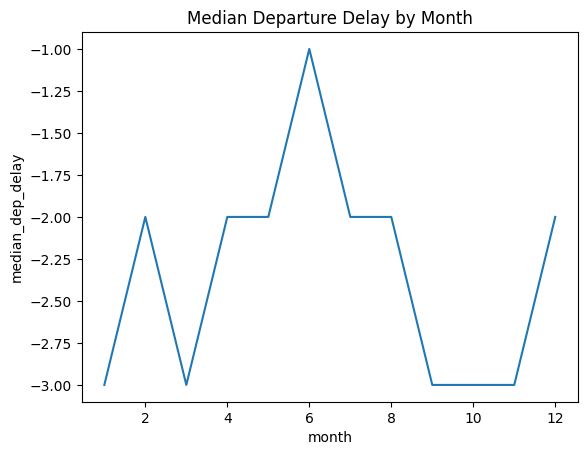

In [5]:
to_plot = df_flights.groupby('month', as_index=False).agg(median_dep_delay = ('dep_delay','median')).sort_values(by='month')
g = sns.lineplot(data=to_plot, x='month', y='median_dep_delay')
g.set_title('Median Departure Delay by Month')

In [6]:
df_flights.groupby('month', as_index=False).agg(mean_dep_delay = ('dep_delay','mean')).sort_values(by='mean_dep_delay', ascending=False)

,month,mean_dep_delay
5,6,15.070091
7,8,14.395234
6,7,13.759793
11,12,11.973144
1,2,11.781708
4,5,11.245935
3,4,10.368932
0,1,8.835936
2,3,8.379356
10,11,7.368991


In [7]:
to_plot = df_flights.groupby('month', as_index=False).agg(mean_dep_delay = ('dep_delay','mean')).sort_values(by='month')
to_plot

,month,mean_dep_delay
0,1,8.835936
1,2,11.781708
2,3,8.379356
3,4,10.368932
4,5,11.245935
5,6,15.070091
6,7,13.759793
7,8,14.395234
8,9,6.157729
9,10,7.230005


Text(0.5, 1.0, 'Mean Departure Delay by Month')

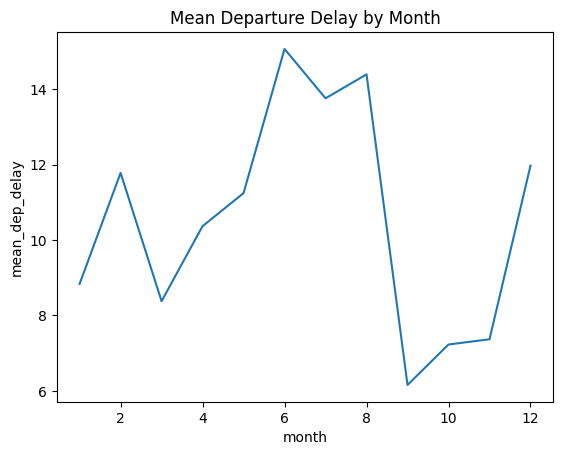

In [8]:
g = sns.lineplot(data=to_plot, x='month', y='mean_dep_delay')
g.set_title('Mean Departure Delay by Month')

<AxesSubplot: >

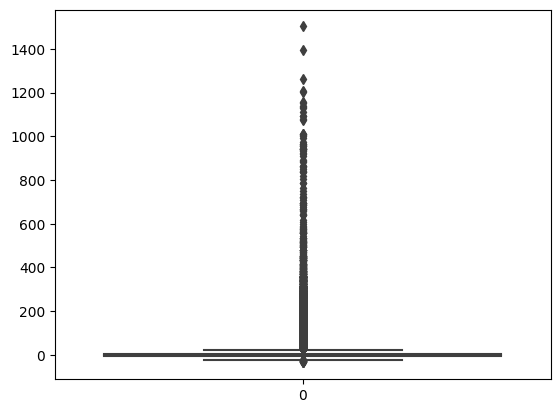

In [9]:
sns.boxplot(data=df_flights['dep_delay'])

<AxesSubplot: xlabel='dep_delay', ylabel='Count'>

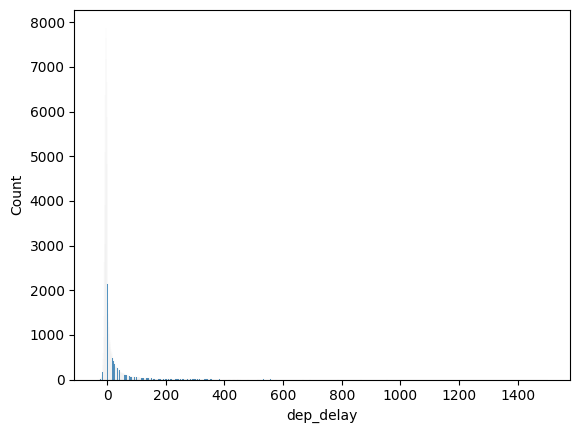

In [10]:
sns.histplot(data=df_flights['dep_delay'])

In [11]:
df_flights['dep_delay'].describe()

count    99380.000000
mean        10.565144
std         46.406515
min        -35.000000
25%         -6.000000
50%         -2.000000
75%          6.000000
max       1503.000000
Name: dep_delay, dtype: float64

In [12]:
df_flights.groupby(['op_unique_carrier','dep_delay']).max('dep_delay').sort_values(by='dep_delay', ascending=False).head(20)

mkt_carrier_fl_num  op_carrier_fl_num  \
op_unique_carrier dep_delay                                          
MQ                1503.0                   3907               3907   
AA                1395.0                    482                482   
EV                1264.0                   4206               4206   
AA                1208.0                    162                162   
YV                1201.0                   6171               6171   
9E                1157.0                   3333               3333   
OO                1155.0                   5500               5500   
                  1141.0                   5405               5405   
NK                1133.0                    313                313   
B6                1129.0                   1280               1280   
9E                1112.0                   3285               3285   
EV                1095.0                   4446               4446   
OO                1092.0                   5345               5345   
UA                1080.0                    749                749   
G7                1075.0                   6306               6306   
AA                1011.0                   2305               2305   
OO                1009.0                   3195               3195   
DL                1006.0                    921                921   
UA                1001.0                    257                257   
EV                991.0                    5429               5429   

                             origin_airport_id  dest_airport_id  crs_dep_time  \
op_unique_carrier dep_delay                                                     
MQ                1503.0                 11980            11298           605   
AA                1395.0                 11292            14107          1203   
EV                1264.0                 12339            11618          1600   
AA                1208.0                 12173            12892          1255   
YV                1201.0                 14321            12264          1445   
9E                1157.0                 14635            12953          1703   
OO                1155.0                 14696            13930          1229   
                  1141.0                 11637            11292          1656   
NK                1133.0                 11433            11298          2030   
B6                1129.0                 11618            10721           510   
9E                1112.0                 14321            12953          1320   
EV                1095.0                 12451            12266          1910   
OO                1092.0                 11292            13244          1740   
UA                1080.0                 11292            11618          1255   
G7                1075.0                 14524            10721          1747   
AA                1011.0                 12478            14771          1615   
OO                1009.0                 10140            14107          1525   
DL                1006.0                 13577            10397           605   
UA                1001.0                 13204            11292          1614   
EV                991.0                  10721            14524          1945   

                             dep_time  taxi_out  wheels_off  wheels_on  \
op_unique_carrier dep_delay                                              
MQ                1503.0        708.0       8.0       716.0      856.0   
AA                1395.0       1118.0      13.0      1131.0     1149.0   
EV                1264.0       1304.0      10.0      1314.0     1505.0   
AA                1208.0        903.0      19.0       922.0     1739.0   
YV                1201.0       1046.0       5.0      1051.0     1207.0   
9E                1157.0       1220.0      19.0      1239.0        NaN   
OO                1155.0        744.0      12.0       756.0      727.0   
                  1141.0       1157.0  

Average / median monthly flight delay is higher in the summer months in the US - May to August. This may be because people tend to go on vacation more during the summer, especially when children are not in school and families can take trips.

Overall, the distribution of flight delays is highly positively skewed, with some extreme outliers where planes were very delayed.